<IPython.core.display.Javascript object>


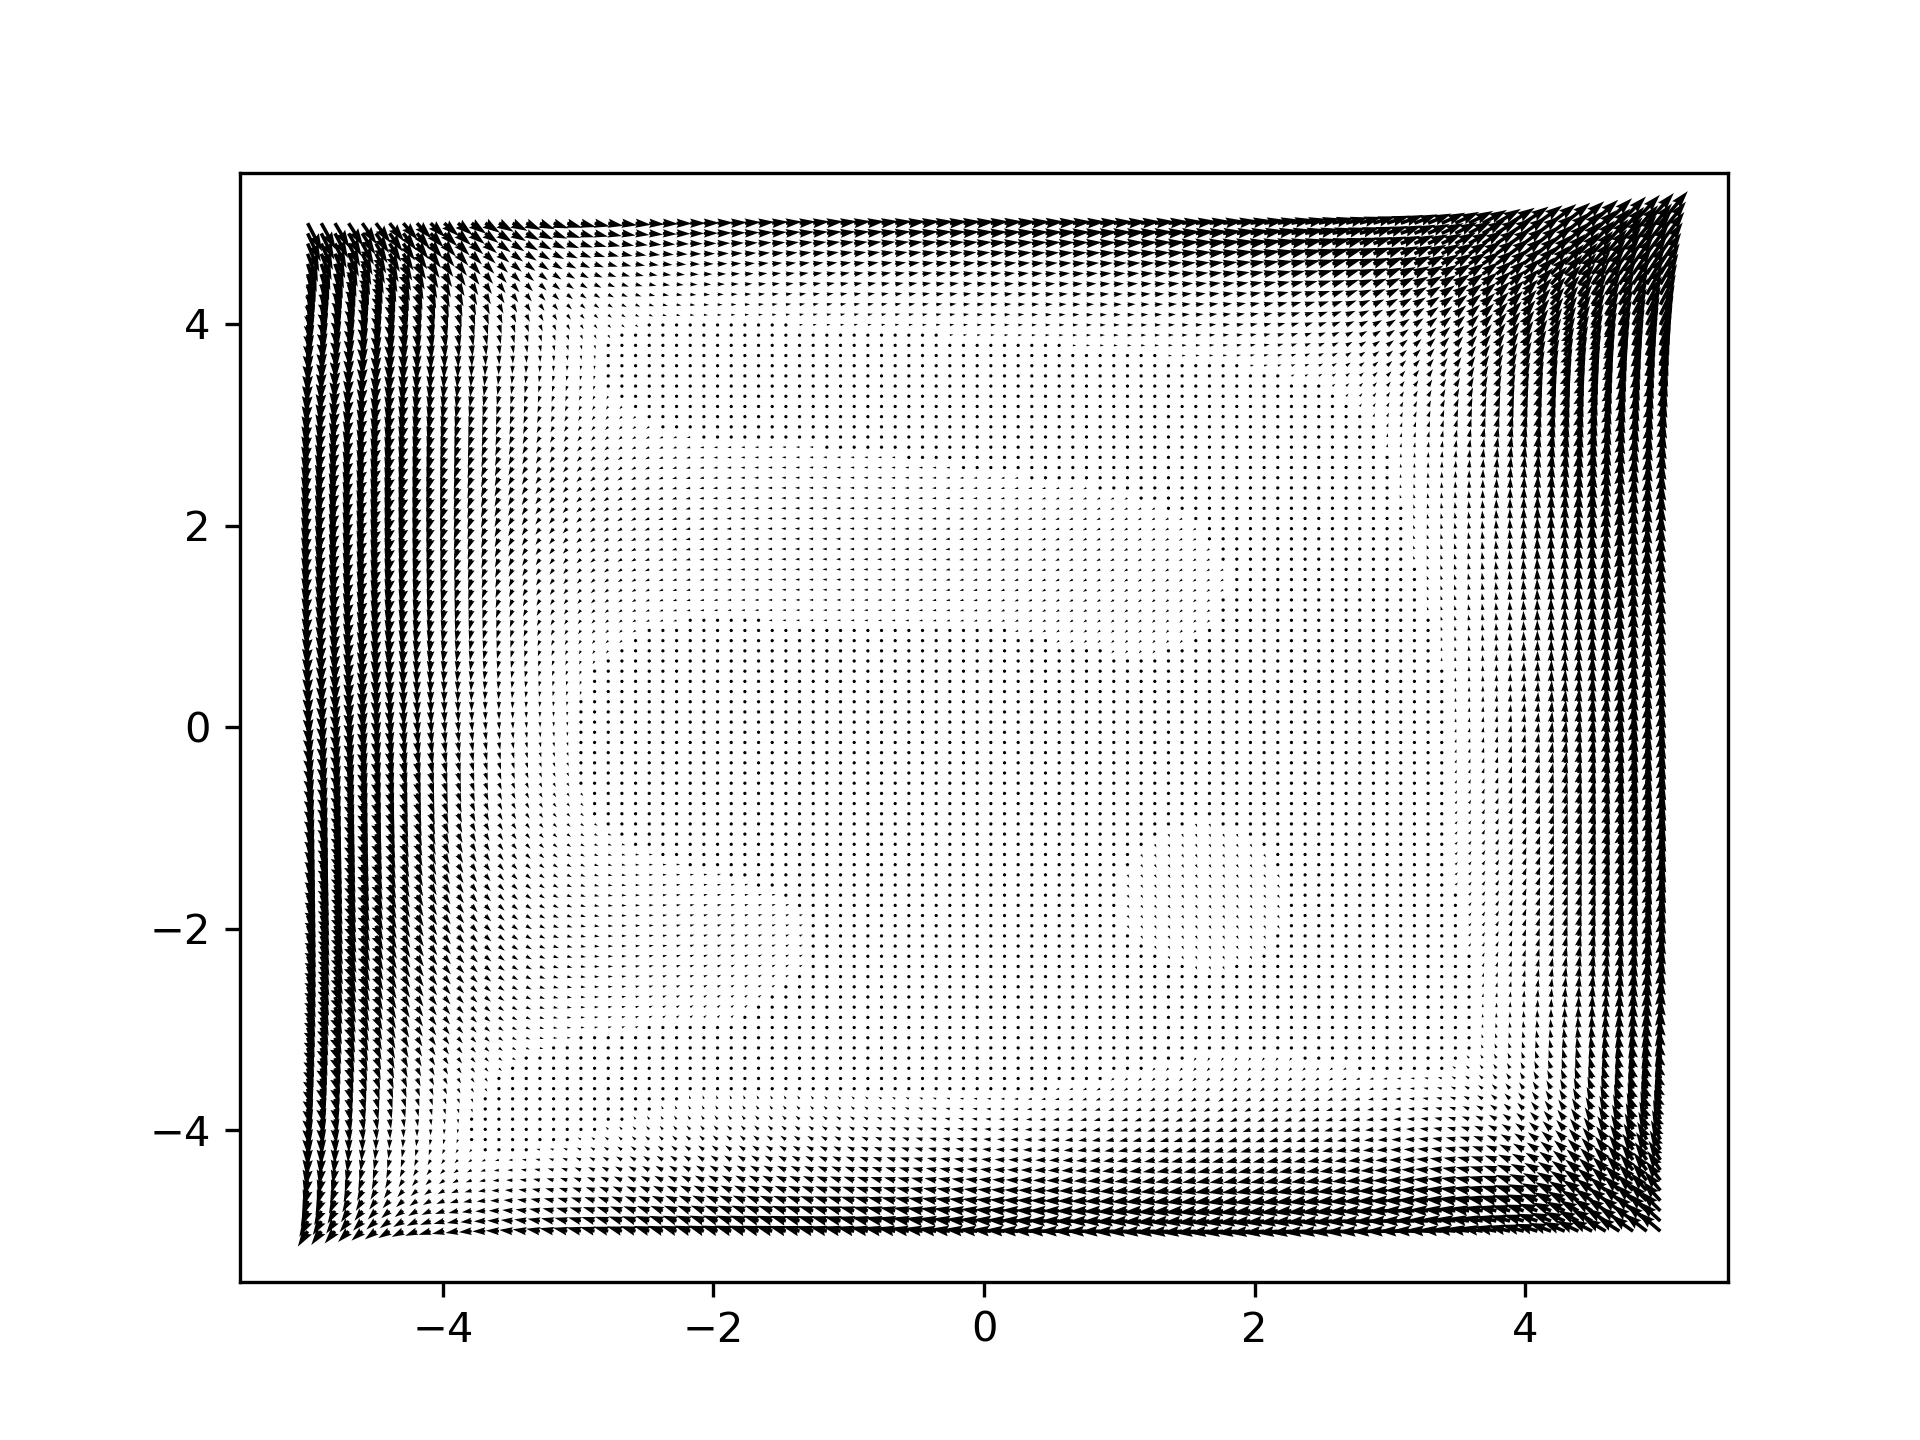

HeatMap
[[0.188143   0.16462605 0.14510473 ... 0.43252212 0.46163191 0.4949804 ]
 [0.17739121 0.15290823 0.13245509 ... 0.38958892 0.41867502 0.45201415]
 [0.16978699 0.14437188 0.12302039 ... 0.35181565 0.38089278 0.4142373 ]
 ...
 [0.52508674 0.46796705 0.41688495 ... 0.74640326 0.81087764 0.88181502]
 [0.54507301 0.48790001 0.43677964 ... 0.80030317 0.86591709 0.93803314]
 [0.56853521 0.51132293 0.46017834 ... 0.85987371 0.92666599 1.        ]]


<IPython.core.display.Javascript object>


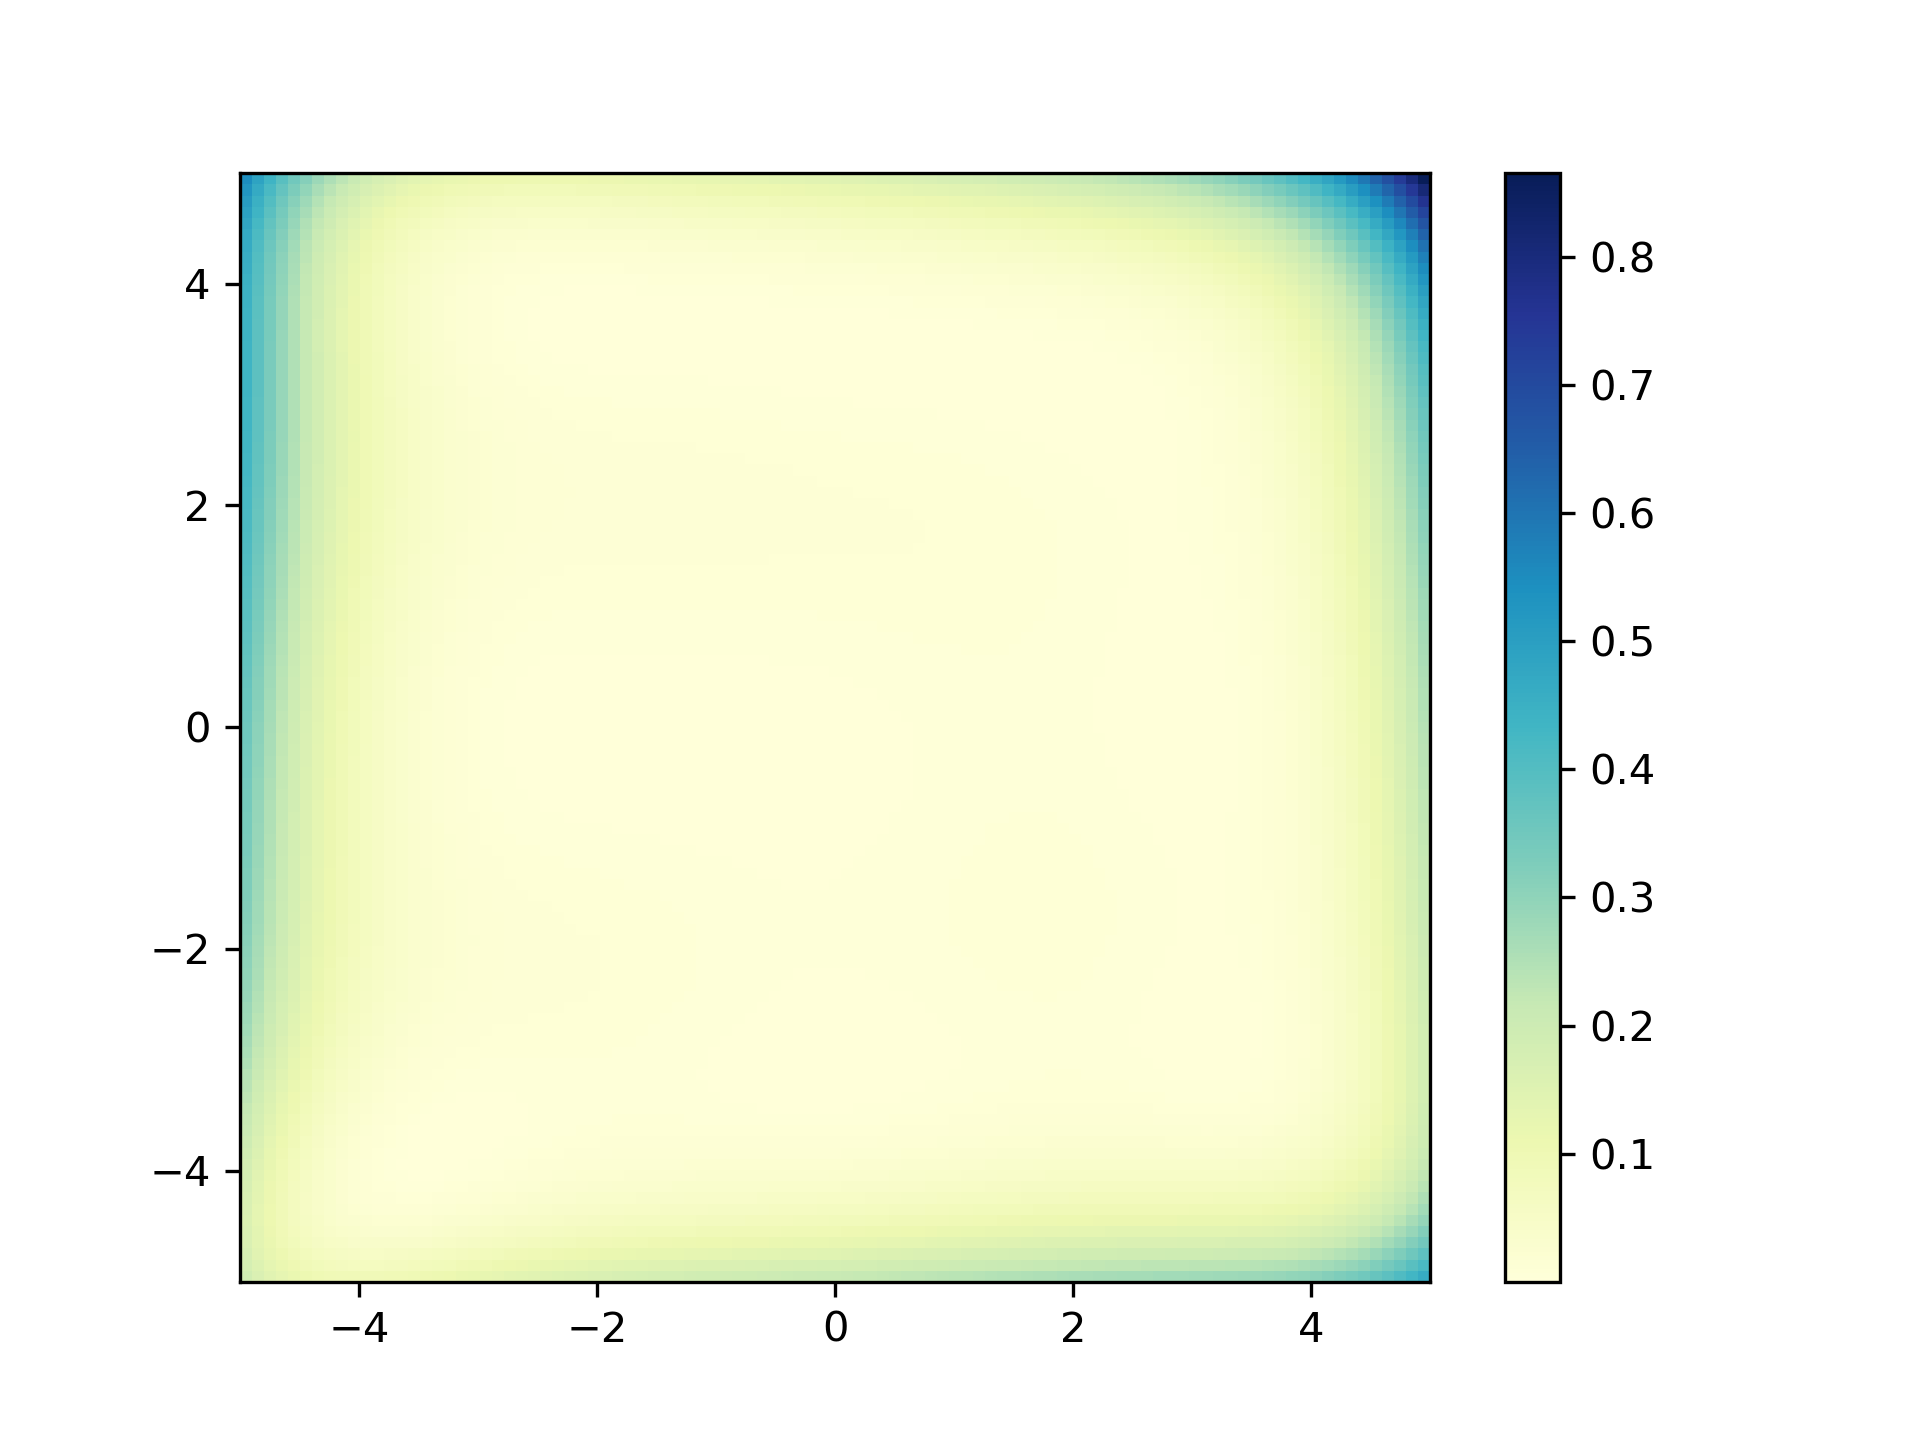

In [22]:
# Name: Jiajin Liang
# Email: jil904@ucsd.edu

# Question 1

#import matplotlib 3d plotting#import 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import numpy as np
#computing the numerical gradient of sin(xy)
#
#define a grid of points

#h = 0.001#step
#xs = -1 + np.array(range(0,(int)(1/h))) * 2 * h
#ys = -1 + np.array(range(0,(int)(1/h))) * 2 * h
nrpts = 100
xs = np.linspace(-5, 5, num = nrpts)
ys = np.linspace(-5, 5, num = nrpts)
xs = xs.reshape( (nrpts,1) )
ys = ys.reshape( (1, nrpts) )
h = 1. / nrpts

#gradx = (np.sin( (xs +h).dot(ys) ) - np.sin( xs.dot(ys) ) ) / h 
#grady = (np.sin( xs.dot( ys +h) ) - np.sin( xs.dot(ys) ) ) / h
gradx = (((xs+h)**2+ys-11)**2+((xs+h)+ys**2-7)**2-((xs**2+ys-11)**2+(xs+ys**2-7)**2))/h
grady = ((xs**2+(ys+h)-11)**2+(xs+(ys+h)**2-7)**2-((xs**2+ys-11)**2+(xs+ys**2-7)**2))/h
#plotting the vector field
fig, ax = plt.subplots()
q = ax.quiver(xs, ys, gradx, grady)
plt.show()

#plotting the gradient as heat map
#compute heatmap at each point for [gradx, grady]
heatmap = gradx*gradx + grady*grady
heatmap = heatmap / np.max(np.max(heatmap))
print("HeatMap")
print(heatmap)
#'RdBu'
cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)
plt.show()

-3.8000000000000034 -3.300000000000003
3.0000000000000027 2.0000000000000018
-2.8000000000000025 3.1000000000000028
3.600000000000003 -1.9000000000000017
Trajactory in Heatmap:


<IPython.core.display.Javascript object>


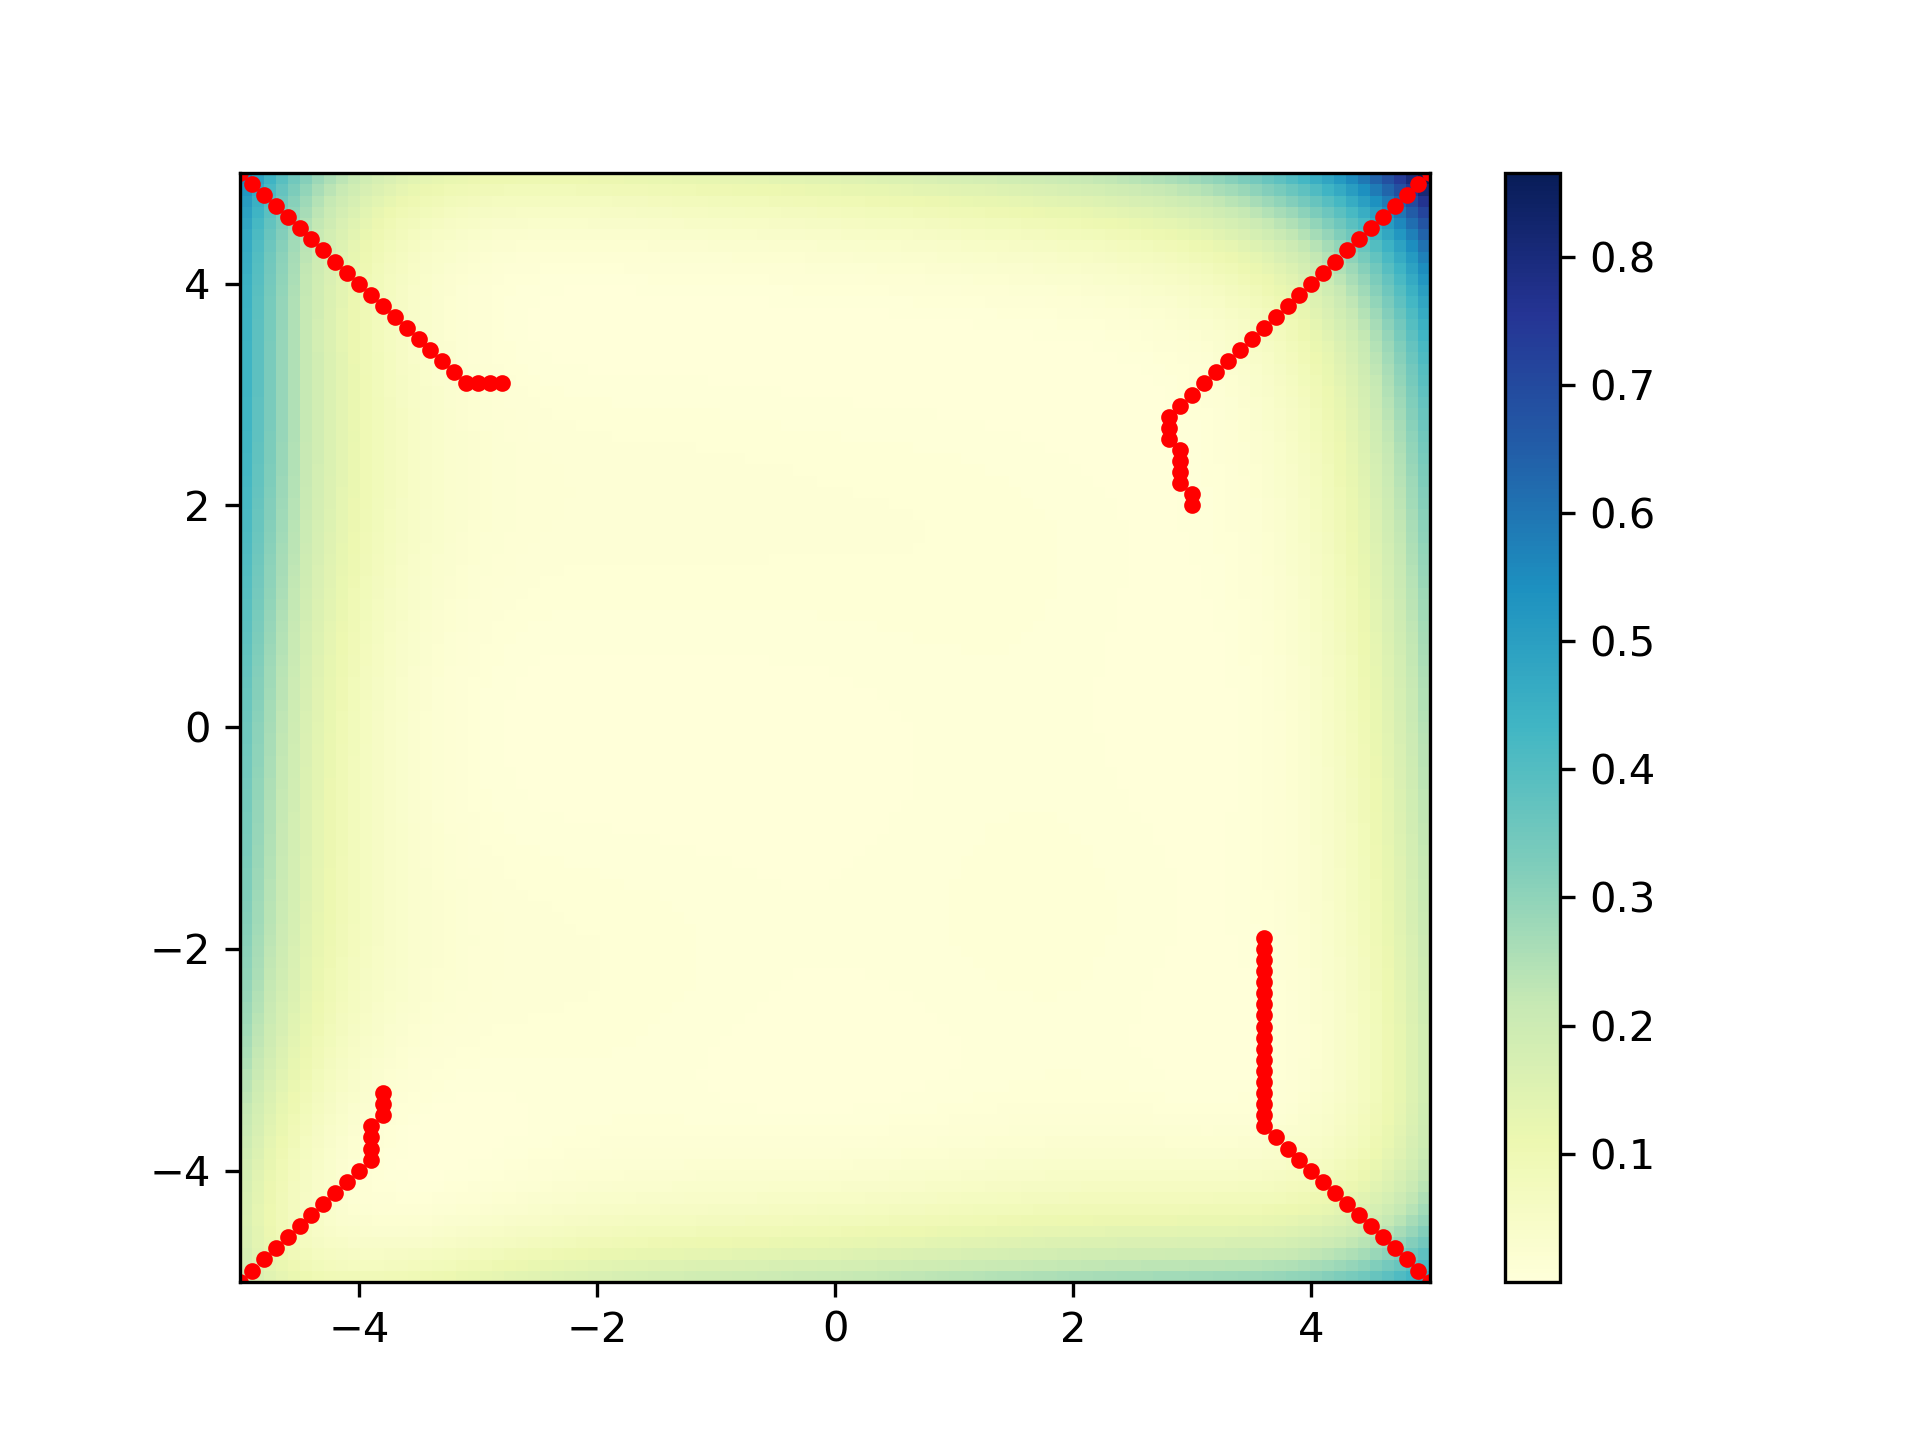

In [123]:
# Question 2
def func(x,y):
    return ((x**2+y-11)**2+(x+y**2-7)**2)
def simple_traj(sx,sy):
    traj = [(sx,sy)]
    h = 0.1
    precision = 0.01
    while True:
        arr = [[sx,sy+h],[sx,sy-h],[sx+h,sy],[sx+h,sy+h],[sx+h,sy-h],
               [sx-h,sy],[sx-h,sy+h],[sx-h,sy-h]]
        farr = [func(xy[0],xy[1]) for xy in arr]
        smallest = np.min(farr)
        #print(sx,sy,func(sx,sy),smallest)
        if (func(sx,sy) - smallest < precision)or(func(sx,sy)-smallest<0):
            return sx,sy,traj
        sx = arr[np.argmin(farr)][0]
        sy = arr[np.argmin(farr)][1]
        traj.append((sx,sy))
        
r = [(x,y) for x in np.random.random((10,))*10-5 for y in np.random.random((10,))*10-5]

#for randomxy in r:
#    x, y = simple_traj(randomxy[0],randomxy[1])
#    print(x,y)
x,y,t1 = simple_traj(-5,-5)
print(x,y)
x,y,t2 = simple_traj(5,5)
print(x,y)
x,y,t3 = simple_traj(-5,5)
print(x,y)
x,y,t4 = simple_traj(5,-5)
print(x,y)

#plotting the gradient as heat map
#compute heatmap at each point for [gradx, grady]
nrpts = 100
xs = np.linspace(-5, 5, num = nrpts)
ys = np.linspace(-5, 5, num = nrpts)
xs = xs.reshape( (nrpts,1) )
ys = ys.reshape( (1, nrpts) )
h = 1. / nrpts

gradx = (((xs+h)**2+ys-11)**2+((xs+h)+ys**2-7)**2-((xs**2+ys-11)**2+(xs+ys**2-7)**2))/h
grady = ((xs**2+(ys+h)-11)**2+(xs+(ys+h)**2-7)**2-((xs**2+ys-11)**2+(xs+ys**2-7)**2))/h
heatmap = gradx*gradx + grady*grady
heatmap = heatmap / np.max(np.max(heatmap))
#print("HeatMap")
#print(heatmap)
#'RdBu'
print("Trajactory in Heatmap:")
cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)
#plotting the trajactory
for t in t1+t2+t3+t4:
    plt.plot(t[0], t[1], 'r.')
plt.show()

In [90]:
sx = 0.1
sy = 0.1
h = 0.1
a = [[sx,sy+h],[sx,sy-h],[sx+h,sy],[sx+h,sy+h],[sx+h,sy-h],[sx-h,sy],[sx-h,sy+h],[sx-h,sy-h]]
b = [func(xy[0],xy[1]) for xy in a]
smallest = np.min(b)
sx = a[np.argmin(b)][0]
sy = a[np.argmin(b)][1]
sx, sy

(0.2, 0.2)